# Assignment 2
## Basic Parameter Estimation
Note that you do *not* need to write Python code for the mandatory aprts 2. and 3.

-----------------

__1. Below are some parameter estimation scenarios. For each case, which cost function is the most suitable, RMSE, $\chi^2$ or $G^2$? Is the function linear with respect to its parameters? Is it differentiable with respect to its parameters?__

   __a.__ Assume $y(x_1,x_2)$ is the BOLD signal measured in a region of interest, and $x_1$ and $x_2$ are two experimental parameters that the experimenter can choose at will. We would like to fit the following model:  $$y(x_1, x_2) = a_0 + a_1 x_1 + a_2 x_2$$
   

<span style="color:blue">Linear. Any model of the form $y=a_0 + \sum_{i=1}^{P} a_i x_i$ is considered linear.
A linear model is always differentiable. RMSE is the only choice of cost function since $y$ is continuous</span>

__b.__ Assume $y(x)$ is the response of a subject to experimental stimulus $x$. $y$ is modeled such that:
$$ y=1 \text{ if  } a x >0 $$
$$ y=0 \text{ otherwise } $$

<span style="color:blue">Non-Linear as it does not have the form given above. Furthermore, it is non-differentiable because of the abrupt step. Since this is a two category task, $\chi^2$ or $G^2$ is preferred.</span>

__c.__ Neurons emit all-or-none spikes or action potentials. Assume $p(n)$ is probability that a neuron emits an action potential when stimulated with $n$ identical pulses. $p$ is modeled according to:
$$ p(n)=\frac{1}{1+e^{-\beta n}} $$


<span style="color:blue">Non-Linear as it does not have the form given above. However, it is differentiable (this is function is a "sigmoid" function). Since this is a two category task, $\chi^2$ or $G^2$ is preferred.</span>

-----------------

__2. On a large number of participants, the time to complete a cognitive task (denoted RT) was recorded for $N$ trials. Two different models can be used to fit the RT averaged across participants__

The Exponential Model
$$ RT(n) = a_1 + a_2 e^{- \beta n}$$

The Power Model
$$ RT(n) = a_1 + a_2 (n + a_3)^{-\beta}$$

where $a_1$, $a_2$, and $a_3$ and $\beta$ are parameters and $n$ is the trial number. Note that the exponential model has one less parameter than the power model.

The following data is observed (blue dots). Additionally, both functions have been fitted using the Nelder-Mead approach and the resulting curves are shown in the figure underneath:


|trial | 0   | 1   | 2   | 3   | 4   |
|------|-----|-----|-----|-----|-----|
|RT    | 5529| 3469| 1706| 1939| 1227|

<center>
    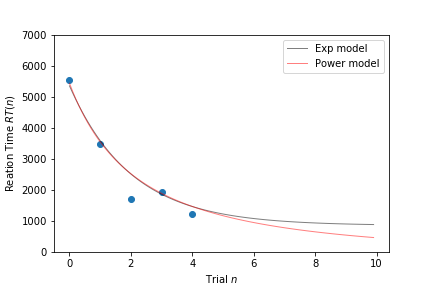
</center>

Assume that a fitting method gave the following parameters: 

| Parameter | Exp Model | Power Model |
| --- | --- | --- | 
|$a_1$| 851.3 | -243.40 |
|$a_2$| 4496| 30156 |
|$a_3$| None   | 3.14 |
|$\beta$| 0.5| 1.46 |

Answer the following questions:

    a. Calculate the RMSE for both models. Which model provides the best fit?
    b. What is the predicted RT for n=5
    c. Now assume a new data sample is observed: n = 6 RT = 1199. For each model, does the new the RMSE increase or descrease?
    d. With the new data sample, which model provides the best fit?

<span style="color:blue"> a. The RMSE values are 386.06 for the exponential model and 384.05 for the power model. Because the power model has a lower rmse, it provides a better fit to this data. See below for an example of how to compute the rmse

In [14]:
import numpy as np
d = np.array([5529., 3469., 1706., 1939., 1227.])
n = np.array([0,1,2,3,4])
rt_exp = 851.3+4496*np.exp(-.5*n)
rt_pow = -243.4+30156*(n+3.14)**(-1.46)
rmse_exp = np.sqrt(np.mean((d-rt_exp)**2))
rmse_pow = np.sqrt(np.mean((d-rt_pow)**2))
print("RMSE EXP: {0:.2f} -- RMSE POW:{1:.2f}".format(rmse_exp, rmse_pow))

RMSE EXP: 386.04 -- RMSE POW:384.05


<span style="color:blue"> b. the prediced RT is 1220.35 for the exponential model and 1168.69 for the power model

In [15]:
rt_exp_5 = 851.3+4496*np.exp(-.5*5)
rt_pow_5 = -243.4+30156*(5+3.14)**(-1.46)
print("RT EXP: {0:.2f} RT POW {1:.2f}".format(rt_exp_5, rt_pow_5))

RT EXP: 1220.35 RT POW 1168.69


<span style="color:blue"> c. The new RMSE values are  356.01 and 365.15 for the exponential and power model, respectively. We can use the same code as in (a), but simply extend d and n. Note that np.mean automatically takes care of the 1/N factor in the RMSE formula.

In [16]:
d = np.array([5529., 3469., 1706., 1939., 1227.,1199])
n = np.array([0,1,2,3,4,6])
rt_exp = 851.3+4496*np.exp(-.5*n)
rt_pow = -243.4+30156*(n+3.14)**(-1.46)
rmse_exp = np.sqrt(np.mean((d-rt_exp)**2))
rmse_pow = np.sqrt(np.mean((d-rt_pow)**2))
print("RMSE EXP: {0:.2f} -- RMSE POW:{1:.2f}".format(rmse_exp, rmse_pow))

RMSE EXP: 356.01 -- RMSE POW:365.15


<span style="color:blue">  d. The exponential model provides the best fit

-----------------

__3. Optional: Perform a parameter fit with Python.__ 

Start by loading the relevant modules

In [44]:
import numpy as np
from matplotlib import pylab as plt
import scipy.optimize

Let's assume that $x$ is an experiment parameter and $d$ is the observed data (20 samples). Here we will use the following model for fitting and data generation, 
$$
y(x) = \frac{1}{1+e^{-(p_0 + p_1 x)}}
$$
Using the model for data synthesis and fitting is commen when studying the optimization methods. Write the function here:

In [45]:
def model(params, x):
    '''
    params: is a list or numpy array containing two parameters
    x: are the model inputs
    '''
    p0 = params[0]
    p1 = params[1]
    return 1./(1+np.exp(-(p0+p1*x)))

Let's generate some data from our model and add some noise to it (too make it "look" like true data)

In [46]:
N = 20
x = np.linspace(-15,15,N) 
true_parameters = [.1, .37]
d = model(true_parameters,x) + np.random.normal(0,.04,N)

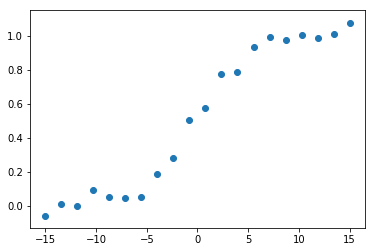

In [47]:
plt.scatter(x,d);

Now we're ready to do the fit. First construct a function that returns the RMSE.

In [56]:
def rmse(params):
    return np.sqrt(np.mean((d-model(params, x))**2))

The following function from the scipy module will do the fit. For this to work, you need to choose an initial guess of the parameters. This should be a list or numpy array with the same dimensions as `true_parameters`.

In [57]:
rmse(true_parameters)

0.04147570078533946

In [58]:
initial_guess =  [.1,.3]
return_fit = scipy.optimize.minimize(rmse, initial_guess, method = 'Nelder-Mead') #This is the Nelder Mead (simplex) optimizer seen in class
fitted_parameters = return_fit['x'] #this extracts the fitted parameters

Now plot the fit and the data on top of each other:

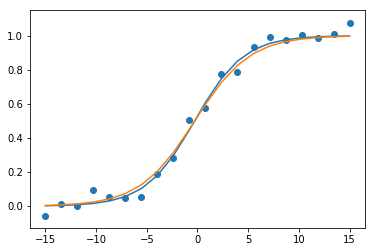

In [59]:
plt.scatter(x,d, label = 'data');
plt.plot(x, model(fitted_parameters, x), label = 'model');
plt.plot(x, model(true_parameters, x), label = 'model');